# Reading Files

In [8]:
files = []
for y in range(16, 22):
    for m in range(1, 13):
        for d in range(1, 32):
            if m<10 and d<10:
                fp = 'C:/data/Eventi/Muoni_Orario_20{}_0{}_0{}.txt'.format(y, m, d)
            elif m<10 and d>=10:
                fp = 'C:/data/Eventi/Muoni_Orario_20{}_0{}_{}.txt'.format(y, m, d)
            elif m>=10 and d<10:
                fp = 'C:/data/Eventi/Muoni_Orario_20{}_{}_0{}.txt'.format(y, m, d)
            elif m>=10 and d>=10:
                fp = 'C:/data/Eventi/Muoni_Orario_20{}_{}_{}.txt'.format(y, m, d)
            files.append(fp)

In [10]:
import pandas as pd
data = []
for file in files:
    try:
        temp = pd.read_table(file, sep = r'\s+', names = ['event_id','time','theta_x','theta_y'])
        data.append(temp)
    except:
        None
df = pd.concat(data, axis = 0, ignore_index = True)
df.to_csv('data')

# Visualizing Data

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('data')

In [35]:
df

,Unnamed: 0,event_id,time,theta_x,theta_y
0,0,ST42C6,13:35:15,-8.89,-6.42
1,1,ST42C7,13:35:41,-7.60,0.00
2,2,ST42C8,13:36:06,-0.55,-2.48
3,3,ST42C9,13:40:15,-31.76,-13.77
4,4,ST42CA,13:40:40,23.59,0.00
...,...,...,...,...,...
4454612,4454612,ST1163,23:58:07,-10.17,-4.31
4454613,4454613,ST1164,23:58:27,-10.26,2.53
4454614,4454614,ST1165,23:59:21,-22.97,-5.27
4454615,4454615,ST1166,23:59:56,-30.47,13.76


In [10]:
theta_x = df.theta_x[np.isfinite(df.theta_y)][np.isfinite(df.theta_x)]
theta_y = df.theta_y[np.isfinite(df.theta_x)][np.isfinite(df.theta_y)]
theta_x.size, theta_y.size

(4361949, 4361949)

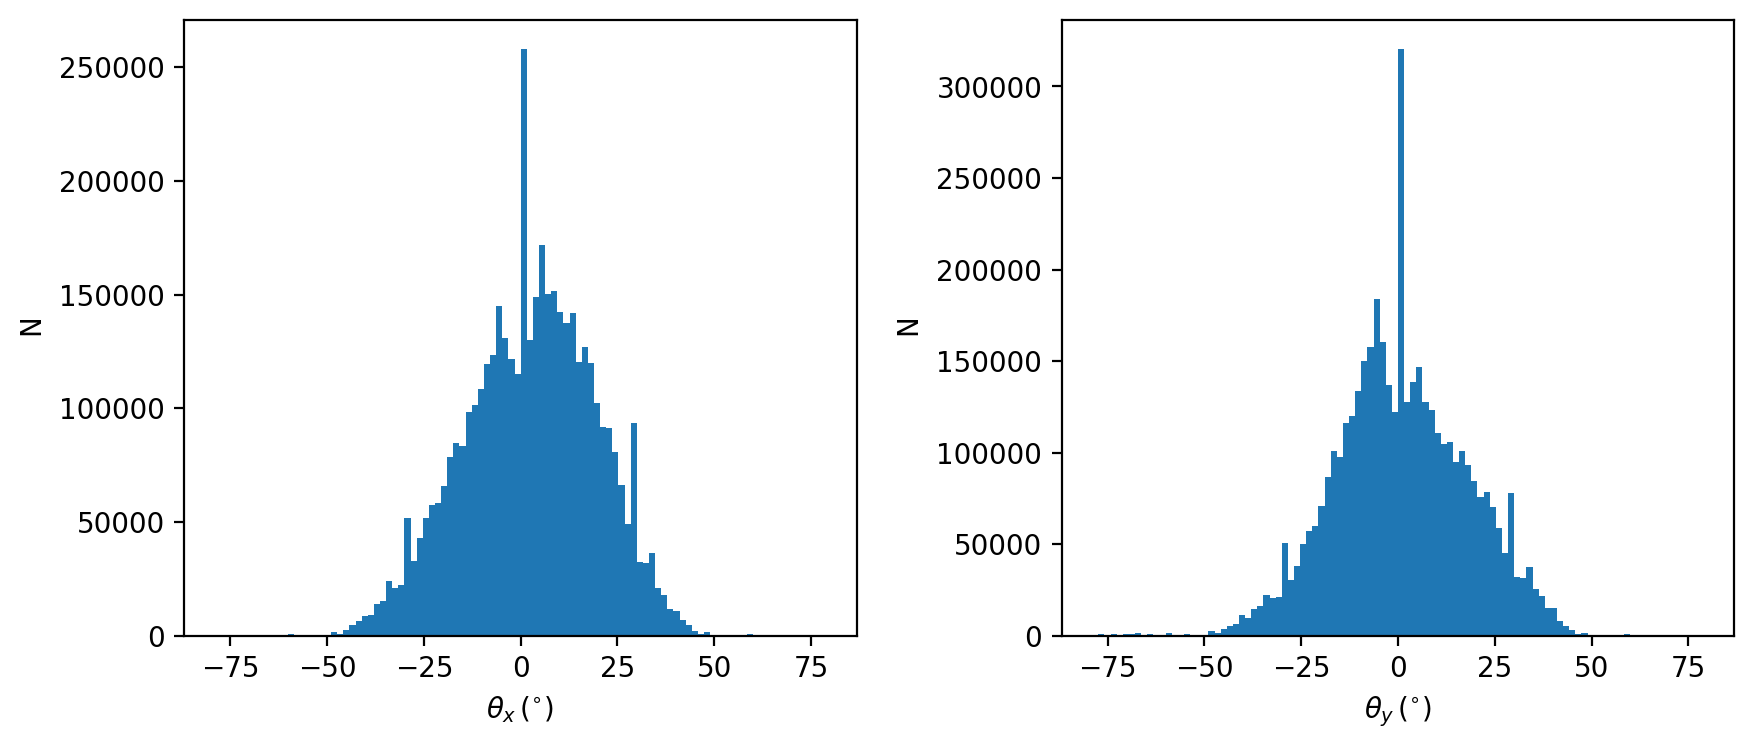

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (10, 4), dpi=200)
gs = gridspec.GridSpec(1, 9)
ax0 = fig.add_subplot(gs[:, :4])
ax1 = fig.add_subplot(gs[:, 5:])
nbins = 100
data_x, bins_x, p_x = ax0.hist(theta_x, nbins)
ax0.set_xlabel(r'$\theta_x \, (^{\circ})$')
ax0.set_ylabel(r'$\mathrm{N}$')
data_y, bins_y, p_y = ax1.hist(theta_y, nbins)
ax1.set_xlabel(r'$\theta_y \, (^{\circ})$')
ax1.set_ylabel(r'$\mathrm{N}$')
plt.show()

In [12]:
import numpy as np
valid_x = theta_x[theta_y!=0][theta_y!=-29.75][theta_y!=29.75][theta_y!=29.74][theta_x!=0][theta_x!=-29.75][theta_x!=29.75][theta_x!=29.74]
valid_y = theta_y[theta_x!=0][theta_x!=-29.75][theta_x!=29.75][theta_x!=29.74][theta_y!=0][theta_y!=-29.75][theta_y!=29.75][theta_y!=29.74]
valid_x.size, valid_y.size

(3869112, 3869112)

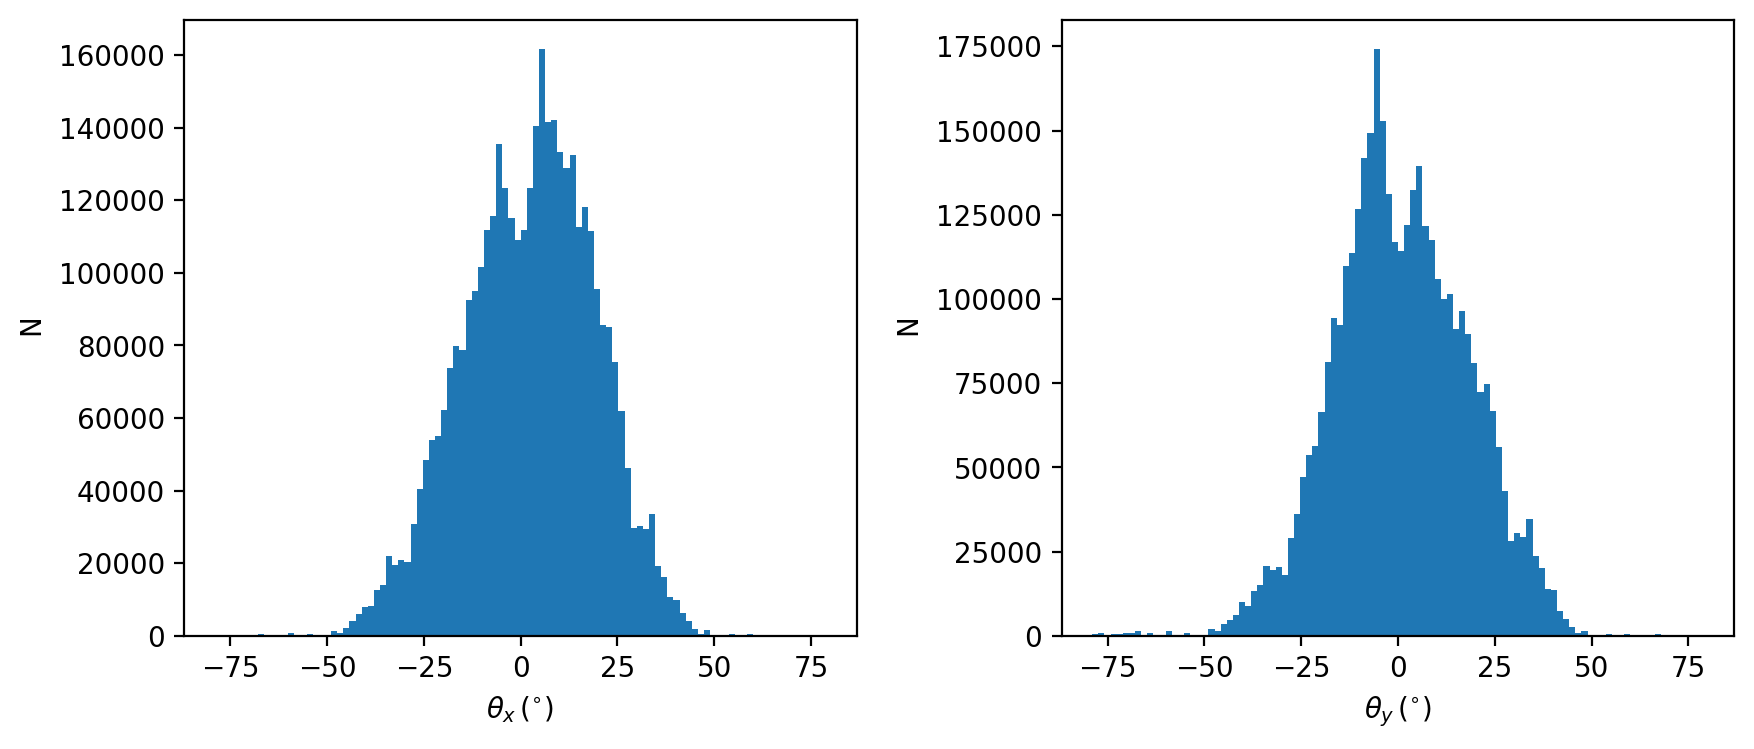

In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (10, 4), dpi=200)
gs = gridspec.GridSpec(1, 9)
ax0 = fig.add_subplot(gs[:, :4])
ax1 = fig.add_subplot(gs[:, 5:])
nbins = 100
data_x, bins_x, p_x = ax0.hist(valid_x, nbins)
ax0.set_xlabel(r'$\theta_x \, (^{\circ})$')
ax0.set_ylabel(r'$\mathrm{N}$')
data_y, bins_y, p_y = ax1.hist(valid_y, nbins)
ax1.set_xlabel(r'$\theta_y \, (^{\circ})$')
ax1.set_ylabel(r'$\mathrm{N}$')
plt.show()

In [14]:
mx = np.tan(np.radians(valid_x))
my = np.tan(np.radians(valid_y))
theta = np.arccos(1/np.sqrt(mx**2+my**2+1))
phi = np.arctan2(my, mx)

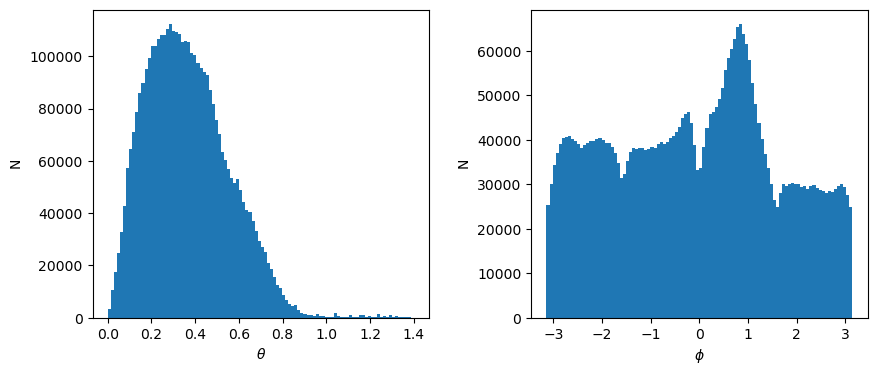

In [15]:
fig = plt.figure(figsize = (10, 4), dpi=100)
gs = gridspec.GridSpec(1, 9)
ax0 = fig.add_subplot(gs[:, :4])
ax1 = fig.add_subplot(gs[:, 5:])
nbins = 100
n_t, bins_t, p_t = ax0.hist(theta, nbins)
ax0.set_xlabel(r'$\theta$')
ax0.set_ylabel(r'$\mathrm{N}$')
n_p, bins_p, p_p = ax1.hist(phi, nbins)
ax1.set_xlabel(r'$\phi$')
ax1.set_ylabel(r'$\mathrm{N}$')
plt.show()

In [16]:
x_t = (bins_t[1:] + bins_t[:-1])/2
x_p = (bins_p[1:] + bins_p[:-1])/2
n_t_err = np.sqrt(n_t)
n_p_err = np.sqrt(n_p)

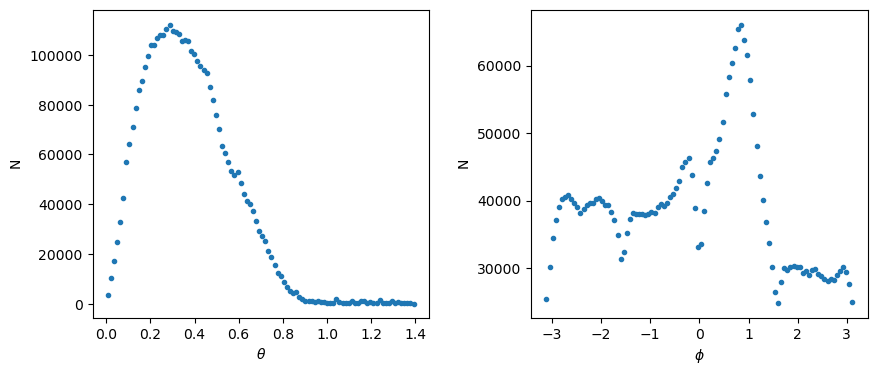

In [17]:
fig = plt.figure(figsize = (10, 4), dpi=100)
gs = gridspec.GridSpec(1, 9)
ax0 = fig.add_subplot(gs[:, :4])
ax1 = fig.add_subplot(gs[:, 5:])
ax0.errorbar(x_t, n_t, n_t_err, fmt = '.')
ax0.set_xlabel(r'$\theta$')
ax0.set_ylabel(r'$\mathrm{N}$')
ax1.errorbar(x_p, n_p, n_p_err, fmt = '.')
ax1.set_xlabel(r'$\phi$')
ax1.set_ylabel(r'$\mathrm{N}$')
plt.show()

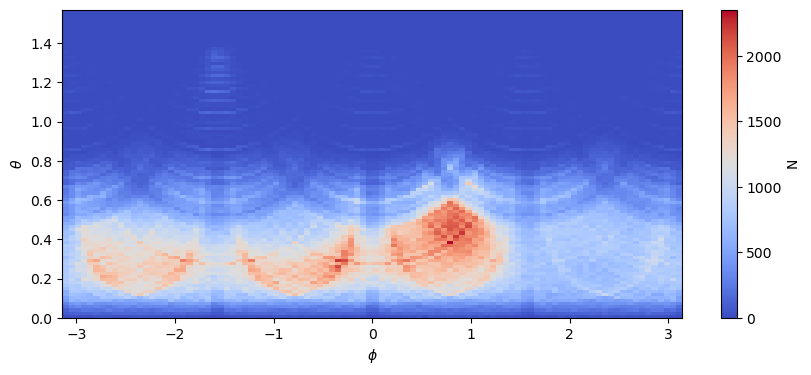

In [18]:
from matplotlib import cm
fig, ax = plt.subplots(figsize = (10, 4))
nbins = 100
phi_range = (-np.pi, np.pi)
theta_range = (0, np.pi/2)
h, phi_edges, theta_edges, im = ax.hist2d(phi, theta, nbins,
                                          range = (phi_range, theta_range), density = False, cmap = 'coolwarm')
fig.colorbar(im, ax = ax, label = r'$\mathrm{N}$')
ax.set(xlabel = r'$\phi$', ylabel = r'$\theta$')
plt.show()

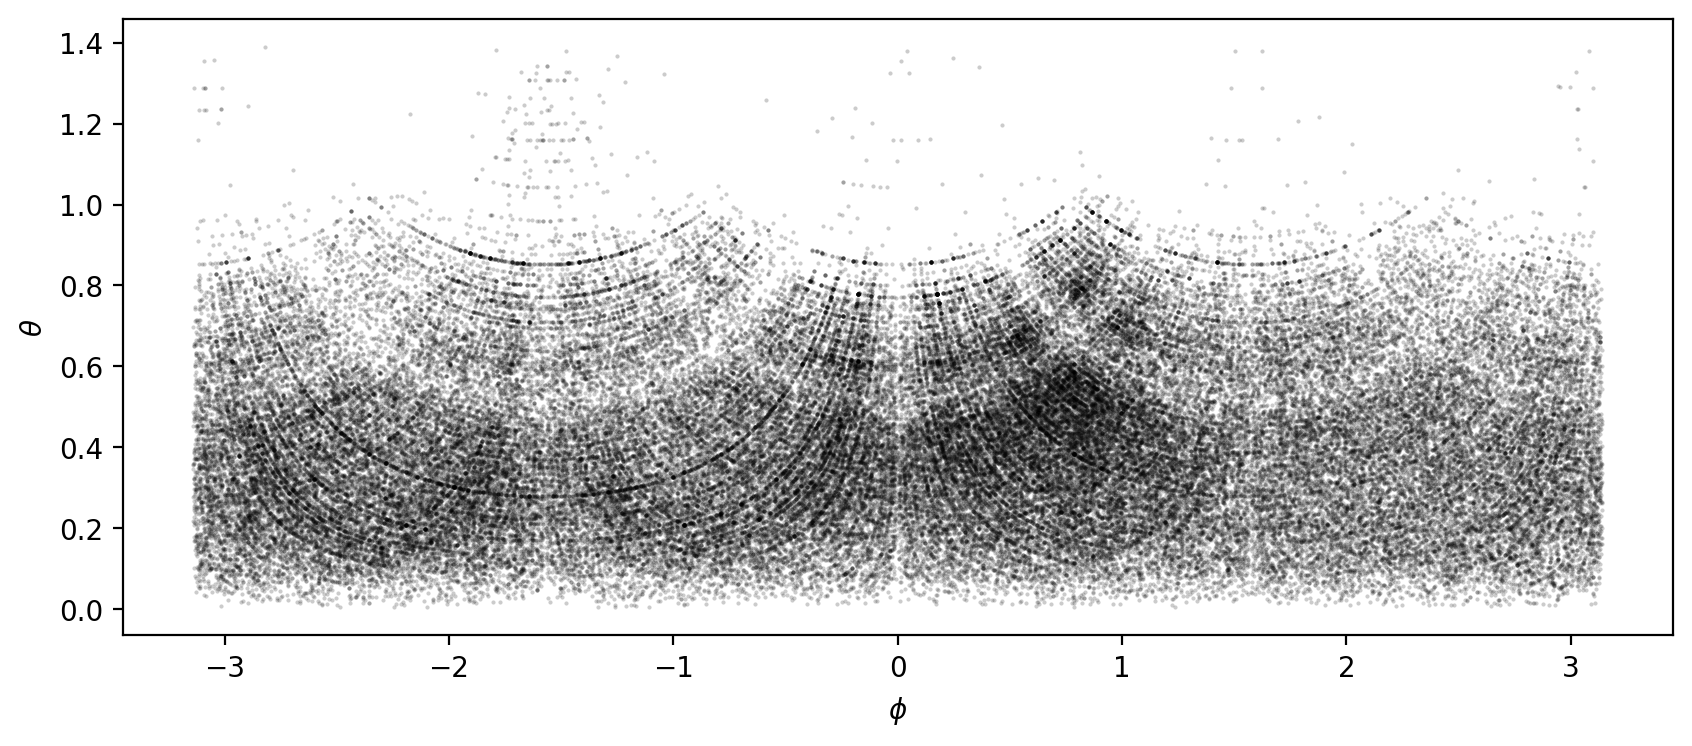

In [20]:
plt.figure(figsize = (10, 4), dpi = 200)
nmax = 100000
plt.scatter(phi[:nmax], theta[:nmax], marker='.', s=1, color='k', alpha=0.2)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\theta$')
plt.show()